In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 52.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## ***`PAIRED DATASET GENERATION`***



***Next 4 cells will generate dataset where each image has its annotation file and vice versa***

In [ ]:
!unzip  "/content/drive/MyDrive/NITC_project/ShipRSImageNet_V1.zip" -d training_data

In [ ]:
import os
image_paths = [os.path.join('ShipRSImageNet_V1/VOC_Format/cloudless', x) for x in os.listdir('ShipRSImageNet_V1/VOC_Format/cloudless') if x[-3:] == "bmp"]
image_paths.sort()
annotations = [os.path.join('ShipRSImageNet_V1/VOC_Format/Annotations', x) for x in os.listdir('ShipRSImageNet_V1/VOC_Format/Annotations') if x[-3:] == "xml"]
annotations.sort()

for i in image_paths:
    head_tail = os.path.split(i)
    path=head_tail[0]
    filename=head_tail[1]
    annotname=os.path.splitext(filename)[0]+'.xml'
    exist=0
    for j in annotations:
        exist=os.path.exists('ShipRSImageNet_V1/VOC_Format/Annotations/'+annotname)
        if exist:
          break
    if not exist:
        os.remove(i)

In [ ]:
!zip -r ShipRSImageNet_dataset.zip training_data

**Upload updated dataset to google drive**

In [ ]:
import shutil
shutil.copy("ShipRSImageNet_dataset.zip","/content/drive/MyDrive/NITC_project/")

***Continued...***

In [ ]:
!unzip "/content/drive/MyDrive/NITC_project/SatelliteCloudGenerator-main.zip" -d cloud_generator

In [ ]:
%cd cloud_generator/SatelliteCloudGenerator-main/

/content/cloud_generator/SatelliteCloudGenerator-main


In [ ]:
!unzip  "/content/drive/MyDrive/NITC_project/ShipRSImageNet_dataset.zip" -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/001055.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/1848__920_1979.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/001904.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/000818.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/1459__1840_920.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/2584__2760_1834.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/002117.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/001693.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/100000777.xml  
  inflating: dataset/training_data/ShipRSImageNet_V1/VOC_Format/Annotations/001957.xml  
  inflating: dataset/training_d

In [ ]:
!apt-get install src

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package src


In [ ]:
!pip install -q torch==1.10.0 torchvision numpy imageio kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 881.9/881.9 MB 33.1 MB/s eta 0:00:01tcmalloc: large alloc 1102381056 bytes == 0x38190000 @  0x7fb808f44680 0x7fb808f64da2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 KB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 21.3 MB/s eta 0:00:00
     ━

In [ ]:
import random
import sys
sys.path.append('./SatelliteCloudGenerator/')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from src import *
import imageio

plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
import os 
os.rename("/content/cloud_generator/SatelliteCloudGenerator-main/dataset/training_data/ShipRSImageNet_V1/VOC_Format/JPEGImages", "/content/cloud_generator/SatelliteCloudGenerator-main/dataset/training_data/ShipRSImageNet_V1/VOC_Format/cloudless")

In [ ]:
file_list=os.listdir('/content/cloud_generator/SatelliteCloudGenerator-main/dataset/training_data/ShipRSImageNet_V1/VOC_Format/cloudless')
!mkdir '/content/cloud_generator/SatelliteCloudGenerator-main/dataset/training_data/ShipRSImageNet_V1/VOC_Format/cloudy'

In [ ]:
%cd /content/cloud_generator/SatelliteCloudGenerator-main/dataset/training_data/ShipRSImageNet_V1/VOC_Format

In [ ]:
# !unzip  "/content/drive/MyDrive/NITC_project/916images_1.zip"

In [ ]:
# file_list=os.listdir('/content/cloud_generator/SatelliteCloudGenerator-main/916images_1/cloudless')
# !mkdir '/content/cloud_generator/SatelliteCloudGenerator-main/916images_1/cloudy'

In [ ]:
# %cd /content/cloud_generator/SatelliteCloudGenerator-main

/content/cloud_generator/SatelliteCloudGenerator-main


In [ ]:
# %cd 916images_1/

/content/cloud_generator/SatelliteCloudGenerator-main/916images_1


In [ ]:
#convert tensor to an image
from PIL import Image 
import PIL 
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor) 

random.seed(25)
from google.colab import files
plt.style.use('dark_background')
for i in file_list:
  rgb_img = imageio.imread('./cloudless/'+i)[...,:3]/255
  cl, mask = add_cloud(rgb_img,
                      min_lvl=0.4,
                      max_lvl=0.6,
                      decay_factor=random.random(),
                      return_cloud=True)
  # image object is returned 
  img=tensor_to_image(cl)
  filepath = './cloudy/'+i
  img=img.save(filepath)

In [ ]:
!zip -r cloudy.zip cloudy

from google.colab import files
files.download('./cloudy.zip') 

  adding: cloudy/ (stored 0%)
  adding: cloudy/764__0_1748.bmp (deflated 33%)
  adding: cloudy/000965.bmp (deflated 57%)
  adding: cloudy/001583.bmp (deflated 38%)
  adding: cloudy/000801.bmp (deflated 42%)
  adding: cloudy/001199.bmp (deflated 44%)
  adding: cloudy/000715.bmp (deflated 37%)
  adding: cloudy/1418__920_1840.bmp (deflated 25%)
  adding: cloudy/1452__2760_1840.bmp (deflated 55%)
  adding: cloudy/000683.bmp (deflated 31%)
  adding: cloudy/000597.bmp (deflated 33%)
  adding: cloudy/000528.bmp (deflated 36%)
  adding: cloudy/000717.bmp (deflated 36%)
  adding: cloudy/1420__2364_920.bmp (deflated 30%)
  adding: cloudy/001379.bmp (deflated 40%)
  adding: cloudy/000765.bmp (deflated 43%)
  adding: cloudy/000373.bmp (deflated 37%)
  adding: cloudy/000769.bmp (deflated 36%)
  adding: cloudy/000626.bmp (deflated 36%)
  adding: cloudy/1456__1840_0.bmp (deflated 38%)
  adding: cloudy/1357__0_1840.bmp (deflated 29%)
  adding: cloudy/000592.bmp (deflated 39%)
  adding: cloudy/000306.b

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
shutil.copy("cloudy.zip","/content/drive/MyDrive/NITC_project/")

'/content/drive/MyDrive/NITC_project/cloudy.zip'

Text(0.5, 1.0, 'Channel-wise Shadow Mask')

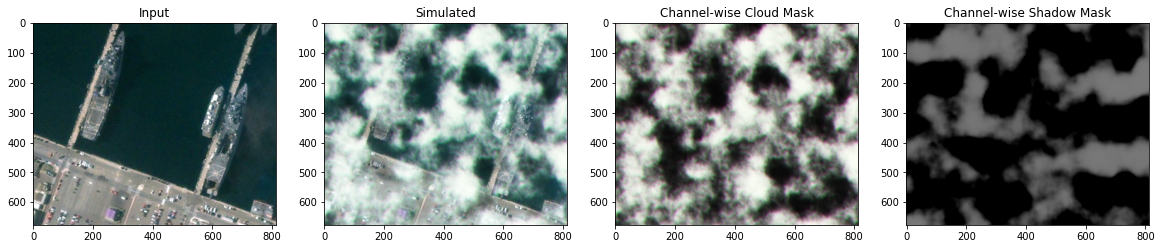

In [ ]:
# rgb_img = imageio.imread('./imgs/100001674.bmp')[...,:3]/255
# cl, cmask, smask = add_cloud_and_shadow(rgb_img,
#                                         min_lvl=0.4,
#                                         max_lvl=0.6,
#                                         decay_factor=random.random(),
#                                         return_cloud=True
#                                        )
# plt.axis('off')
# plt.imshow(cl)
# plt.savefig('./imgs/cloudy.png')

# plt.subplot(1,4,1)
# plt.imshow(rgb_img)
# plt.title('Input')
# plt.subplot(1,4,2)
# plt.imshow(cl)
# plt.title('Simulated')
# plt.subplot(1,4,3)
# plt.imshow(cmask)
# plt.title('Channel-wise Cloud Mask')
# plt.subplot(1,4,4)
# plt.imshow(smask)
# plt.title('Channel-wise Shadow Mask')

## ***`RESIZE IMAGES`***

In [ ]:
#now we have generated paired dataset of cloudy and cloudless but the dim of all images were different so resize them to 512*512 and can be reduced further acc to requirements
# !unzip  "/content/drive/MyDrive/navneet/ShipRSImageNet_V1_paired.zip" -d paired_dataset

In [ ]:
!unzip  "/content/drive/MyDrive/NITC_project/ShipRSImageNet_V1_resized.zip" -d paired_dataset

In [ ]:
# resize more as it will reduce training time
from PIL import Image
import os
desired_size = (256, 256)
for filename in os.listdir('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudless'):
      img = Image.open(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudless', filename))
      old_size = img.size
      new_size = desired_size
      new_img = img.resize(new_size)
      new_img.save(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudless', filename))

In [ ]:
for filename in os.listdir('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy'):
      img = Image.open(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy', filename))
      old_size = img.size
      new_size = desired_size
      new_img = img.resize(new_size)
      new_img.save(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy', filename))

In [ ]:
# !zip -r ShipRSImageNet_V1_resized.zip ShipRSImageNet_V1

In [ ]:
# import shutil
# shutil.copy("ShipRSImageNet_V1_resized.zip","/content/drive/MyDrive/NITC_project/")

'/content/drive/MyDrive/NITC_project/ShipRSImageNet_V1.zip'

# ***CLOUD REMOVAL***

STEP 1: Install packages

In [ ]:
!pip install split-folders
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model
import os
from os import listdir
from numpy import asarray, load
from numpy import vstack
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np
from skimage.metrics import structural_similarity as ssim ,mean_squared_error as mse, peak_signal_noise_ratio as psnr
from keras import backend as K
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = '/content/paired_dataset/ShipRSImageNet_V1/VOC_Format'
%cd paired_dataset

/content/paired_dataset


In [ ]:
from keras.models import load_model
from numpy import load, corrcoef
from numpy import vstack
from numpy.random import randint
from math import log10, sqrt, ceil
import pandas as pd

#SSIM metric calculation
def ssim_metric(target, generated):
    ssim1 = tf.image.ssim(target, generated, max_val=1)
    return ssim1

#PSNR Metric Calculation 
def psnr_metric(target, generated):
  mse = np.mean((target - generated)**2)
  if (mse == 0):
    #This means there is no difference between the pixel values/DN values of the source
    #image and the target image. Hence 100% sound and 0% noise
    return 100
  
  max_pixel = 1
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def mean_squared_error(target, generated):
    mse = tf.losses.mean_squared_error(target, generated)
    return K.mean(mse)

4.1 Implement Discriminator Model

(None, 256, 256, 3)
(None, 256, 256, 6)
(None, 128, 128, 64)
(None, 64, 64, 128)
(None, 32, 32, 256)
(None, 16, 16, 512)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 256, 256, 6)  0           ['input

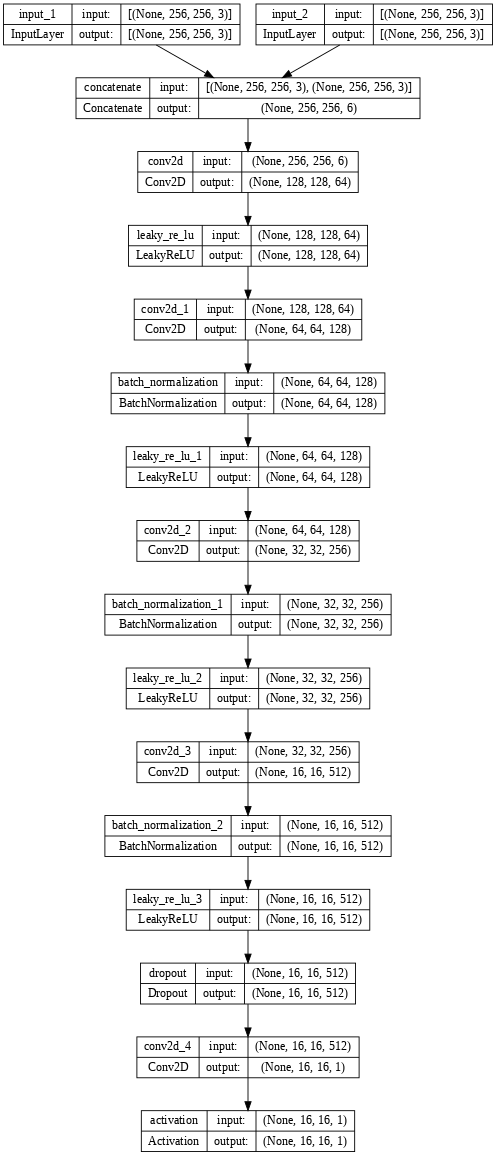

In [ ]:
import tensorflow as tf
def define_discriminator(in_shape=(256,256,3)):
    init = RandomNormal(stddev=0.02)
    # image input
    src_image = Input(shape=in_shape) # 256 x 256 x 3
    target_image= Input(shape=in_shape) # 256 x 256 x 3
    print(src_image.shape)
    # concat label as a channel
    merge = Concatenate()([src_image, target_image]) # 256 x 256 x 4 (4 channels, 3 for image and the other for labels)
    print(merge.shape)  
    # downsample
    #C64
    fe = Conv2D(64, (4,4), strides=(2,2), padding='same')(merge) # 128 x 128 x 64
    fe = LeakyReLU(alpha=0.2)(fe)
    print(fe.shape)
    # downsample
    #C128
    fe = Conv2D(128, (4,4), strides=(2,2), padding='same')(fe) # 64 x 64 x 128
    fe=BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    print(fe.shape)
    #C256
    fe = Conv2D(256, (4,4), strides=(2,2), padding='same')(fe) # 32 x 32 x 256
    fe=BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    print(fe.shape)
    #C512
    fe = Conv2D(512, (4,4), strides=(2,2), padding='same')(fe) # 16 x 16 x 512
    fe=BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe= Dropout(0.4)(fe)
    print(fe.shape)
    # #C512
    # fe = Conv2D(512, (4,4), padding='same')(fe) # 16 x 16 x 512
    # fe=BatchNormalization()(fe)
    # fe = LeakyReLU(alpha=0.2)(fe)
    # fe= Dropout(0.4)(fe)
    # print(fe.shape)


    #output
    fe = Conv2D(1, (3,3), padding='same', kernel_initializer=init)(fe)  # 16 x 16 x 1 
    out_layer = Activation('sigmoid')(fe)
    
    # define model
    ## Combine input label with input image and supply as inputs to the model. 
    model = Model([src_image, target_image], out_layer)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

test_discr = define_discriminator(in_shape=(256,256,3))
print(test_discr.summary())
tf.keras.utils.plot_model(test_discr, show_shapes=True, dpi=64)

Implement Generator Model

In [ ]:
#ENCODER BLOCK

def define_encoder_block(layer_in, n_filters, batchnorm=True):
  '''
  This function protrays the architecture of an encoder block
  '''
  # weight initialization
  init = RandomNormal(stddev=0.02)

  #add downsampling layer
  g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)  	# add downsampling layer

  # conditionally add batch normalization
  if batchnorm:
    g = BatchNormalization()(g, training=True)

  #Activating Leaky RelU
  g = LeakyReLU(alpha=0.2)(g) 	
  return g

In [ ]:
# DECODER BLOCK

def decoder_block(layer_in, skip_in, n_filters, dropout=True):
  '''
  This function portrays the architecture of a decoder block
  '''
  #weight initialization
  init = RandomNormal(stddev=0.02)

  #add upsampling layer
  g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in) 

  #add batch normalization
  g = BatchNormalization()(g, training=True)  	

  # conditionally add dropout
  if dropout:
    g = Dropout(0.5)(g, training=True)
    
  # merge with skip connection
  #basically we concatenate the layers produced by (upconvolution) and the original layer in encoder block
  g = Concatenate()([g, skip_in]) 

  # relu activation
  g = Activation('relu')(g)
  return g

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  3136        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_5 (LeakyReLU)      (None, 128, 128, 64  0           ['conv2d_6[0][0]']               
                                )                                                           

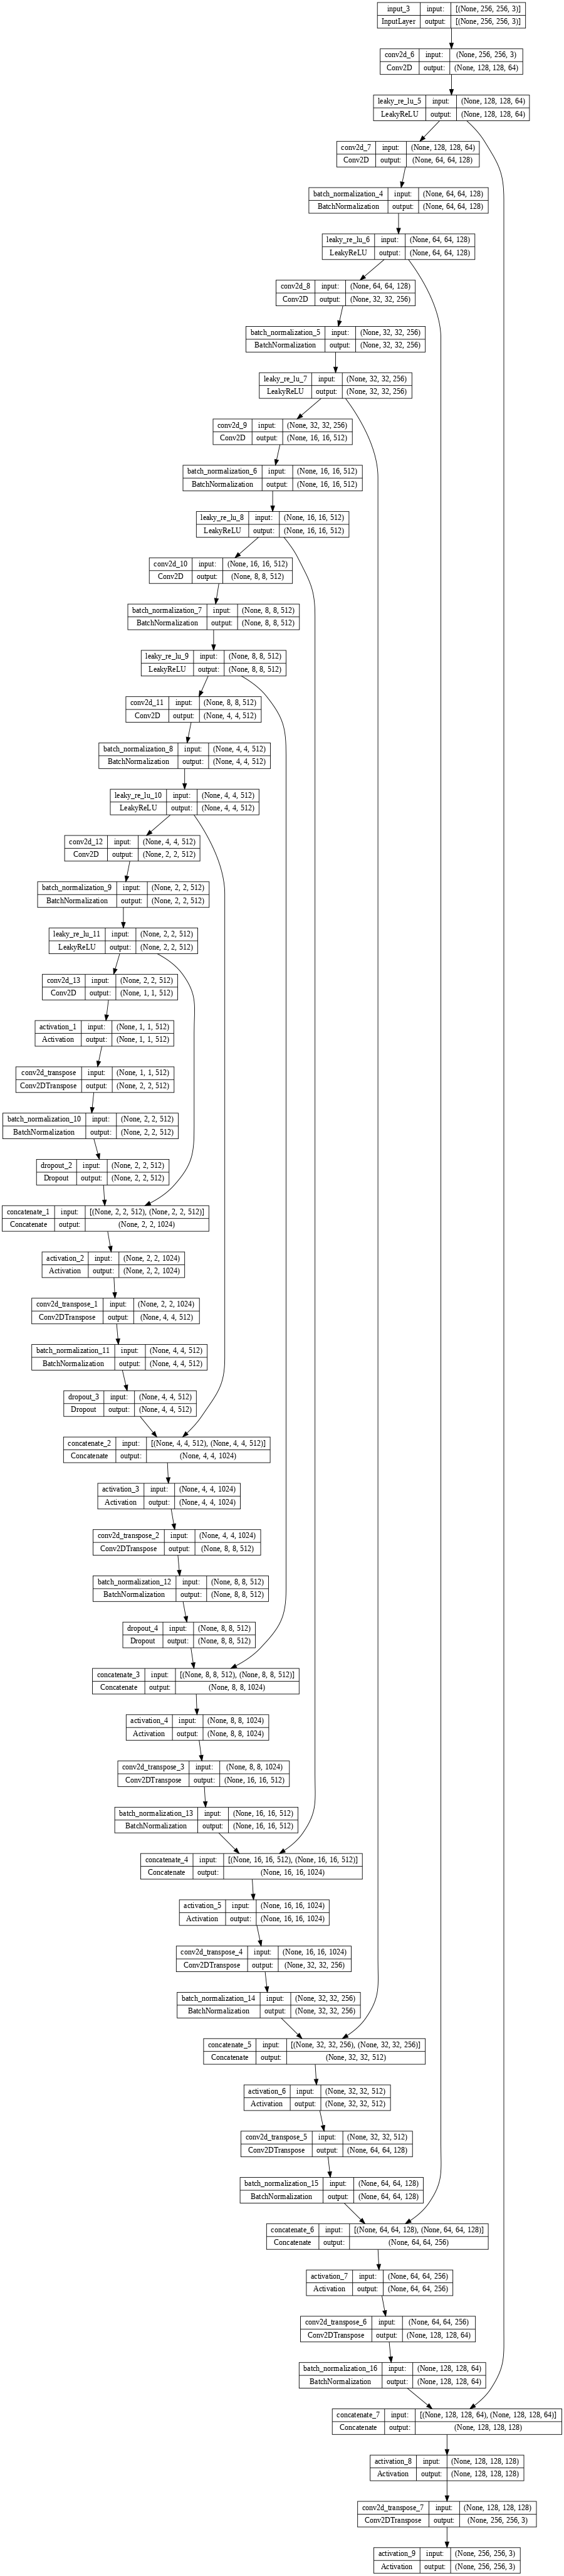

In [ ]:
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False)    #128*128*64
    e2 = define_encoder_block(e1, 128)   # 64 x 64 x 128
    e3 = define_encoder_block(e2, 256)   # 32 x 32 x 256
    e4 = define_encoder_block(e3, 512)   # 16 x 16 x 512
    e5 = define_encoder_block(e4, 512)   # 8 x 8 x 512
    e6 = define_encoder_block(e5, 512)   # 4 x 4 x 512
    e7 = define_encoder_block(e6, 512)   # 2 x 2 x 512
    
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)  # 1 x 1 x 1024
    b = Activation('relu')(b)
    
    # decoder model
    d1 = decoder_block(b, e7, 512)    # 2 x 2 x 1024
    d2 = decoder_block(d1, e6, 512)   # 4 x 4 x 1024
    d3 = decoder_block(d2, e5, 512)   # 8 x 8  x 1024
    d4 = decoder_block(d3, e4, 512, dropout=False)    # 16 x 16 x 1024
    d5 = decoder_block(d4, e3, 256, dropout=False)    # 32 x 32 x 512
    d6 = decoder_block(d5, e2, 128, dropout=False)    # 64 x 64 x 256
    d7 = decoder_block(d6, e1, 64, dropout=False)     # 128 x 128 x 128

    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), activation='tanh', padding='same')(d7) # 256 x 256 x 3
    out_layer=Activation('tanh')(g)
    # define model
    model = Model(in_image, out_layer)
    return model   #Model not compiled as it is not directly trained like the discriminator.

test_gen = define_generator(image_shape=(256,256,3))
print(test_gen.summary())
tf.keras.utils.plot_model(test_gen, show_shapes=True, dpi=64)

In [ ]:
# #Generator is trained via GAN combined model. 
# define the combined generator and discriminator model, for updating the generator
#Discriminator is trained separately so here only generator will be trained by keeping
#the discriminator constant. 
def define_gan(g_model, d_model,image_shape):
	d_model.trainable = False  #Discriminator is trained separately. So set to not trainable.
		
	# define the source image
	in_src = Input(shape=image_shape)
	
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [ ]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
  '''
  This functions selects a batch of random samples and returns an image with its target
  args --> image_stack, number of samples, patch shape
  '''
  # unpack dataset
  trainA, trainB = dataset
  # choose random instances
  ix = randint(0, trainA.shape[0], n_samples)
  
  # retrieve selected images
  X1, X2 = trainA[ix], trainB[ix]
  
  # generate 'real' class labels (1)
  y = ones((n_samples, patch_shape, patch_shape, 1))
  
  return [X1, X2], y

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
  '''
  This function uses the generator model to generate fake samples 
  args --> generator model, number of samples, patch shape
  '''
  # generate fake instance
  X = g_model.predict(samples)
  # create 'fake' class labels (0)
  y = zeros((len(X), patch_shape, patch_shape, 1))
  return X, y

In [ ]:
def summarize_performance(step, g_model, dataset, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0
    # plot real source images
    for i in range(n_samples):
      plt.subplot(3, n_samples, 1 + i)
      plt.axis('off')
      plt.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
      plt.subplot(3, n_samples, 1 + n_samples + i)
      plt.axis('off')
      plt.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
      plt.subplot(3, n_samples, 1 + n_samples*2 + i)
      plt.axis('off')
      plt.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_best.png'
    # filename1 = 'plot_%06d.png' % (step+1)
    plt.savefig(filename1)
    plt.close()
    # save the generator model
    filename2 = 'model_best.h5'
    # filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    shutil.copy(filename2, '/content/drive/MyDrive/NITC_project/model_best.h5')
    print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
#log all losses
d_loss1_log = []
d_loss2_log = []
g_loss_log = []
psnr_before_log = []
psnr_after_log = []
ssim_before_log = []
ssim_after_log = []
mse_before_log = []
mse_after_log = []
def train(d_model, g_model, gan_model, dataset, n_epochs=30, n_batch=1):
  '''
  This function is for training the model based on the pixel-to-pixel architecture to achieve image to image tramslation using GAM
  args --> discriminator model, generator model, GAN model, train/test set, number of epochs, number of train batches/batch size
  '''
  # determine the output square shape of the discriminator
  n_patch = d_model.output_shape[1]
  
  # unpack dataset
  trainA, trainB = dataset
  # valA, valB = dataset_val
  # calculate the number of batches per training epoch
  bat_per_epo = int(len(trainA) / n_batch)
  
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  
  # manually enumerate epochs
  for i in range(n_steps):
        # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        # [X_val_realA, X_val_realB], y_val_real = generate_real_samples(dataset_val, n_batch, n_patch)

        # generate a batch of fake samples
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        # X_val_fakeB, y_val_fake = generate_fake_samples(g_model, X_val_realA, n_patch)

        # update discriminator for real samples
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        d_loss1_log.append(d_loss1)
        # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        d_loss2_log.append(d_loss2)
        
        # update the generator
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        # g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        g_loss_log.append(g_loss)
        # summarize performance - plot loss per epoch
        psnr_before=psnr_metric(X_realA, X_realB) 
        psnr_after=psnr_metric(X_realB, X_fakeB)   # cloudy(X_realA)---> cloudless(X_realB)--- generated/predicted image (X_fakeB)
        ssim_before=ssim_metric(X_realA, X_realB)
        ssim_after=ssim_metric(X_realB, X_fakeB)
        mse_before=mean_squared_error(X_realA, X_realB)
        mse_after=mean_squared_error(X_realB, X_fakeB)
        
        psnr_before_log.append(psnr_before)
        psnr_after_log.append(psnr_after)
        ssim_before_log.append(ssim_before)
        ssim_after_log.append(ssim_after)
        mse_before_log.append(mse_before)
        mse_after_log.append(mse_after)
    
        # this will clear previous outputs
        # from IPython.display import clear_output
        # clear_output(wait=True)

        # display.display(plt.gcf())

        print('>%d, d1[%.3f] d2[%.3f] g[%.3f] psnr_before[%.3f] psnr_after[%.3f] ssim_before[%.3f] ssim_after[%.3f] mse_before[%.3f] mse_after[%.3f]' % (i+1, d_loss1, d_loss2, g_loss, psnr_before, psnr_after, ssim_before, ssim_after, mse_before, mse_after))
        
        if (i + 1) % 1000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
        # (it will execute at the last step)
        if i==n_steps-1:
            plt.clf()
            plt.figure(figsize=(20,12))
            plt.title('Epoch:%d, d1[%.3f] d2[%.3f] g[%.3f]' % (n_epochs, d_loss1, d_loss2, g_loss))
            # plt.title('Epoch:%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
            plt.xlabel('No of iterations', fontsize=16)
            plt.ylabel('Loss', fontsize=16)
            plt.plot(d_loss1_log, 'r-', lw=2, label='d_loss1')
            plt.plot(d_loss2_log, 'b-', lw=1, label='d_loss2')
            plt.plot(g_loss_log, 'g-', lw=1, label='g_loss')
            plt.legend(prop={'size':16}, loc="center")
            plt.show()
            plt.savefig('./loss_graph_%06d.jpg' % (i+1), bbox_inches='tight')
            summarize_performance(i, g_model, dataset)

In [ ]:
input_folder = './ShipRSImageNet_V1/VOC_Format/'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output="dataset", 
                seed=42, ratio=(.8, .2), 
                group_prefix=None) # default values
src='dataset/val'
dest='dataset/test'
os.rename(src,dest)

Copying files: 8248 files [00:04, 1850.68 files/s]


In [ ]:
def load_images(path, size=(256,256)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path+'cloudless'):
        pixels_src = load_img(path + 'cloudy/' + filename, target_size=size)
        pixels_tar = load_img(path + 'cloudless/' + filename, target_size=size)
        # convert to numpy array
        pixels_src = img_to_array(pixels_src)
        pixels_tar = img_to_array(pixels_tar)

        cloudless_img=pixels_tar[:, :256]
        cloudy_img=pixels_src[:, :256]
        src_list.append(cloudy_img)
        tar_list.append(cloudless_img)
    return [asarray(src_list), asarray(tar_list)]

In [ ]:
# dataset path
path = 'dataset/train/'
path_test= 'dataset/test/'
# load dataset
[src_images, tar_images] = load_images(path)
[src_test_images, tar_test_images] = load_images(path_test)
print('Loaded: ', src_images.shape, tar_images.shape)
print('Loaded: ', src_test_images.shape, tar_test_images.shape)

Loaded:  (2198, 256, 256, 3) (2198, 256, 256, 3)
Loaded:  (550, 256, 256, 3) (550, 256, 256, 3)


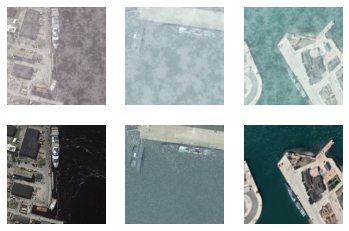

In [ ]:
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

In [ ]:
# define input shape based on the loaded dataset
image_shape = src_images.shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

(None, 256, 256, 3)
(None, 256, 256, 6)
(None, 128, 128, 64)
(None, 64, 64, 128)
(None, 32, 32, 256)
(None, 16, 16, 512)
(None, 16, 16, 512)


In [ ]:
from keras.engine.data_adapter import data_utils
#Define data
# load and prepare training images
data = [src_images, tar_images]
# load and prepare test images
data_test = [src_test_images, tar_test_images]

def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

dataset = preprocess_data(data)
dataset_test = preprocess_data(data_test)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(test_gen=test_gen,
                                 test_discr=test_discr)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
>4821, d1[0.008] d2[0.011] g[10.061] psnr_before[3.377] psnr_after[18.443] ssim_before[0.104] ssim_after[0.653] mse_before[0.460] mse_after[0.014]
1/1 [==============================] - 0s 22ms/step
>4822, d1[0.016] d2[0.002] g[9.855] psnr_before[2.444] psnr_after[19.022] ssim_before[-0.153] ssim_after[0.783] mse_before[0.570] mse_after[0.013]
1/1 [==============================] - 0s 24ms/step
>4823, d1[0.004] d2[0.017] g[6.848] psnr_before[2.433] psnr_after[22.494] ssim_before[-0.123] ssim_after[0.801] mse_before[0.571] mse_after[0.006]
1/1 [==============================] - 0s 22ms/step
>4824, d1[0.002] d2[0.002] g[10.042] psnr_before[2.581] psnr_after[18.016] ssim_before[-0.198] ssim_after[0.537] mse_before[0.552] mse_after[0.016]
1/1 [==============================] - 0s 21ms/step
>4825, d1[0.005] d2[0.002] g[7.923] psnr_before[3.133] psnr_after[19.946] ssim_before[0.020] ssim_af

<Figure size 432x288 with 0 Axes>

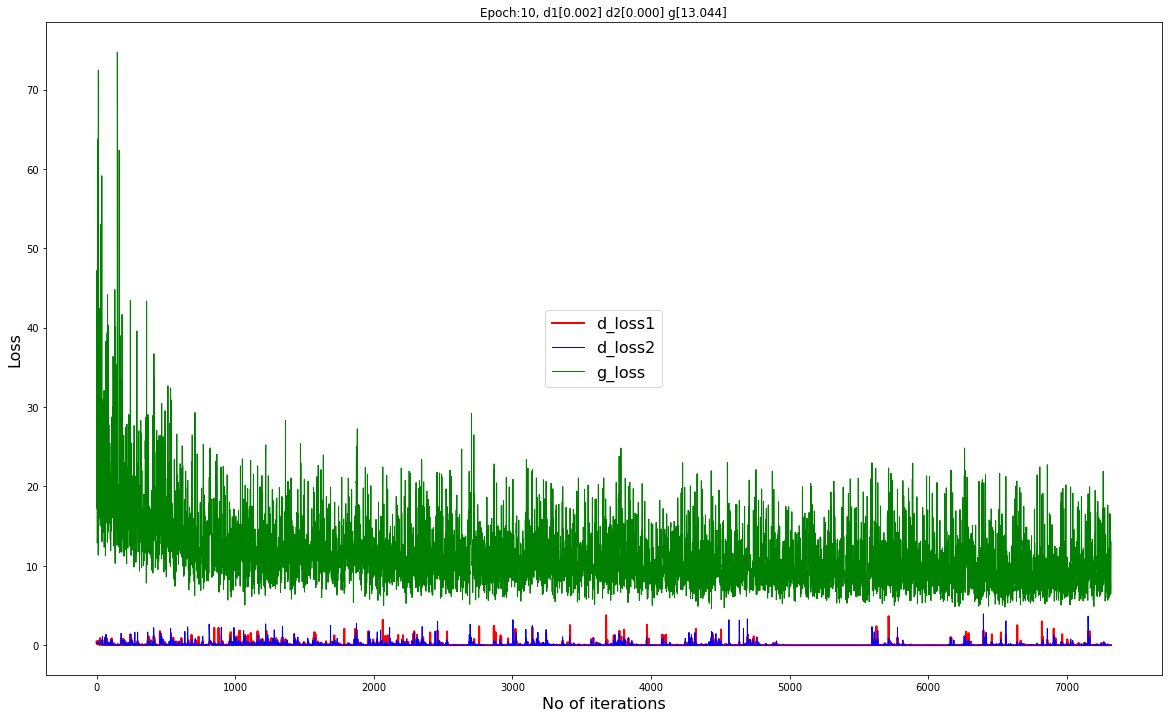

1/1 [==============================] - 1s 790ms/step


>Saved: plot_best.png and model_best.h5


In [ ]:
from datetime import datetime 
start1 = datetime.now() 
n_epochs=10
train(d_model, g_model, gan_model, dataset, n_epochs, n_batch=1) 

EVALUATION

In [ ]:
stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

Execution time is:  0:36:08.266716


In [ ]:
# testing the model
from keras.models import load_model
from numpy.random import randint
model = load_model('model_best.h5')

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	  pyplot.savefig(images[i])
	pyplot.show()

#plot images of train dataset
[X1, X2] = dataset
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)


#plot images of test dataset
[Y1, Y2] = dataset_test
# select random example
iy = randint(0, len(Y1), 1)
src_test_image, tar_test_image = Y1[iy], Y2[iy]
# generate image from source
gen_test_image = model.predict(src_test_image)
# plot all three images
plot_images(src_test_image, gen_test_image, tar_test_image)

#**Saving generated images**

In [ ]:
# testing the model
from keras.models import load_model
from numpy.random import randint
model = load_model('/content/drive/MyDrive/NITC_project/model_best.h5')

In [ ]:
!mkdir dataset/generated

In [ ]:
file_train = os.listdir("/content/paired_dataset/dataset/train/cloudy")
file_test = os.listdir("/content/paired_dataset/dataset/test/cloudy")

In [ ]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from PIL import Image 
import PIL 
import torch
from tensorflow.keras.utils import array_to_img
#plot images of train dataset
[X1, X2] = dataset
[Y1, Y2] = dataset_test

it = randint(0, 1, 1)
for i in file_test:
    src_test_image = Y1[it]
    # generate image from source
    gen_test_image = model.predict(src_test_image)
    result = gen_test_image[0, :, :, :]
    img=array_to_img(result)
    filepath = './dataset/generated/'+i
    img=img.save(filepath)
    it[0] = it[0] + 1

# iy = randint(0, 1, 1)
# print(iy[0])
# print(iy.shape)
# src_test_image = Y1[iy]
# print(src_test_image.shape)
# gen_test_image = model.predict(src_test_image)
# iy[0]=iy[0]+1
# print(iy[0])

1/1 [==============================] - 0s 34ms/step


In [ ]:
it = randint(0, 1, 1)
for i in file_train:
    src_test_image = X1[it]
    # generate image from source
    gen_train_image = model.predict(src_train_image)
    result = gen_train_image[0, :, :, :]
    img=array_to_img(result)
    filepath = './dataset/generated/'+i
    img=img.save(filepath)
    it[0] = it[0] + 1

1/1 [==============================] - 0s 21ms/step


In [ ]:
#resize generated images in 512*512 as cloudy and cloudless images are also in 512*512 resolution
desired_size = (512, 512)
for filename in os.listdir('./dataset/generated'):
      img = Image.open(os.path.join('./dataset/generated', filename))
      old_size = img.size
      new_size = desired_size
      new_img = img.resize(new_size)
      new_img.save(os.path.join('./dataset/generated', filename))

In [ ]:
!zip -r generated.zip './dataset/generated/'
import shutil
shutil.copy("generated.zip","/content/drive/MyDrive/NITC_project/")

  adding: dataset/generated/ (stored 0%)
  adding: dataset/generated/000246.bmp (deflated 11%)
  adding: dataset/generated/100001653.bmp (deflated 16%)
  adding: dataset/generated/1418__2364_920.bmp (deflated 62%)
  adding: dataset/generated/001299.bmp (deflated 16%)
  adding: dataset/generated/100001005.bmp (deflated 26%)
  adding: dataset/generated/100001241.bmp (deflated 10%)
  adding: dataset/generated/000903.bmp (deflated 25%)
  adding: dataset/generated/004696.bmp (deflated 11%)
  adding: dataset/generated/004706.bmp (deflated 28%)
  adding: dataset/generated/100001500.bmp (deflated 21%)
  adding: dataset/generated/002330.bmp (deflated 16%)
  adding: dataset/generated/000934.bmp (deflated 36%)
  adding: dataset/generated/1465__2984_2218.bmp (deflated 59%)
  adding: dataset/generated/100001227.bmp (deflated 13%)
  adding: dataset/generated/1855__0_1979.bmp (deflated 59%)
  adding: dataset/generated/001348.bmp (deflated 12%)
  adding: dataset/generated/2571__920_920.bmp (deflated 4

'/content/drive/MyDrive/NITC_project/generated.zip'

#**Metrics Calculation**

In [ ]:
def cal_avg(log, count):
    avg_log=[]
    for i in range(0, len(log), count):
        start = i
        end = i + count
        window = log[start:end]
        average = sum(window) / len(window)
        avg_log.append(average)
    return avg_log

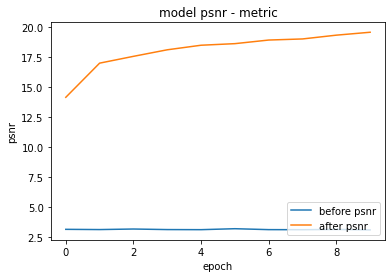

In [ ]:
averaged_psnr_before_values = []
averaged_psnr_after_values = []
averaged_psnr_before_values = cal_avg(psnr_before_log, countTrain)
averaged_psnr_after_values = cal_avg(psnr_after_log, countTrain)  

plt.plot(averaged_psnr_before_values)
plt.plot(averaged_psnr_after_values)
plt.title('model psnr - metric')
plt.ylabel('psnr')
plt.xlabel('epoch')
plt.legend(['before psnr', 'after psnr'], loc='lower right')
plt.savefig('/content/drive/MyDrive/NITC_project/psnr_ae_echo')
plt.show()

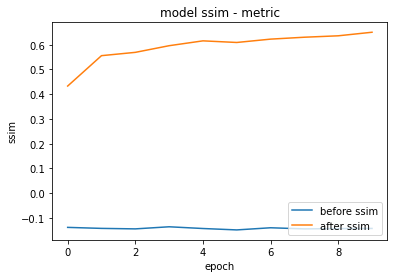

In [ ]:
averaged_ssim_before_values = []
averaged_ssim_after_values = []
averaged_ssim_before_values = cal_avg(ssim_before_log, countTrain)
averaged_ssim_after_values = cal_avg(ssim_after_log, countTrain)  

plt.plot(averaged_ssim_before_values)
plt.plot(averaged_ssim_after_values)
plt.title('model ssim - metric')
plt.ylabel('ssim')
plt.xlabel('epoch')
plt.legend(['before ssim', 'after ssim'], loc='lower right')
plt.savefig('/content/drive/MyDrive/NITC_project/ssim_ae_echo')
plt.show()

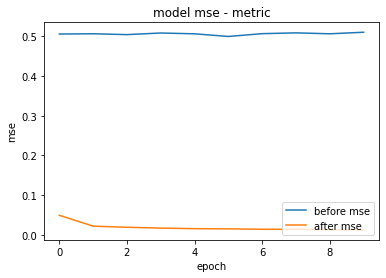

In [ ]:
averaged_mse_before_values = []
averaged_mse_after_values = []
averaged_mse_before_values = cal_avg(mse_before_log, countTrain)
averaged_mse_after_values = cal_avg(mse_after_log, countTrain)  

plt.plot(averaged_mse_before_values)
plt.plot(averaged_mse_after_values)
plt.title('model mse - metric')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['before mse','after mse'], loc='lower right')
plt.savefig('/content/drive/MyDrive/NITC_project/mse_ae_echo')
plt.show()

In [ ]:
#calculating average psnr
psnr_before_avg=sum(psnr_before_log)/len(psnr_before_log)
print('average psnr before',psnr_before_avg)
psnr_after_avg=sum(psnr_after_log)/len(psnr_after_log)
print('average psnr after',psnr_after_avg)

ssim_before_avg=sum(ssim_before_log)/len(ssim_before_log)
print('average ssim before',ssim_before_avg.numpy())
ssim_after_avg=sum(ssim_after_log)/len(ssim_after_log)
print('average ssim after',ssim_after_avg.numpy())

mse_before_avg=sum(mse_before_log)/len(mse_before_log)
print('average mse before',mse_before_avg.numpy())
mse_after_avg=sum(mse_after_log)/len(mse_after_log)
print('average mse after',mse_after_avg.numpy())

d_loss1_avg=sum(d_loss1_log)/len(d_loss1_log)
print('average dloss1', d_loss1_avg)

d_loss2_avg=sum(d_loss2_log)/len(d_loss2_log)
print('average dloss2',d_loss2_avg)

g_loss_avg=sum(g_loss_log)/len(g_loss_log)
print('average gloss',g_loss_avg)

average psnr before 3.1397324988598982
average psnr after 18.079637546194817
average ssim before [-0.14180005]
average ssim after [0.59167385]
average mse before 0.5060253
average mse after 0.019429551
average dloss1 0.06892913090710574
average dloss2 0.07109963363921158
average gloss 11.254972626667856


In [ ]:
!pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 5.5 MB/s eta 0:00:00


In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook("/content/drive/MyDrive/NITC_project/results.xlsx")
worksheet = workbook.add_worksheet()

worksheet.write(0, 1, "PSNR_BEFORE")

worksheet.write_column(1,1, psnr_before_log)

worksheet.write(0, 2, "PSNR_AFTER")

worksheet.write_column(1,2, psnr_after_log)

worksheet.write(0, 3, "SSIM_BEFORE")

worksheet.write_column(1,3, ssim_before_log)

worksheet.write(0, 4, "SSIM_AFTER")

worksheet.write_column(1,4, ssim_after_log)

worksheet.write(0, 5, "MSE_BEFORE")

worksheet.write_column(1,5, mse_before_log)

worksheet.write(0, 6, "MSE_AFTER")

worksheet.write_column(1,6, mse_after_log)

worksheet.write(0, 7, "D_LOSS1")

worksheet.write_column(1,7, d_loss1_log)

worksheet.write(0, 8, "D_LOSS2")

worksheet.write_column(1,8, d_loss2_log)

worksheet.write(0, 9, "G_LOSS")

worksheet.write_column(1,9, g_loss_log)

worksheet.write(0, 10, "AVG_PSNR_BEFORE")

worksheet.write(1, 10, psnr_before_avg)

worksheet.write(0, 11, "AVG_PSNR_AFTER")

worksheet.write(1, 11, psnr_after_avg)

worksheet.write(0,12, "AVG_SSIM_BEFORE")

worksheet.write(1, 12, ssim_before_avg)

worksheet.write(0,13, "AVG_SSIM_AFTER")

worksheet.write(1, 13, ssim_after_avg)

worksheet.write(0, 14, "AVG_MSE_BEFORE")

worksheet.write(1, 14, mse_before_avg)

worksheet.write(0, 15, "AVG_MSE_AFTER")

worksheet.write(1, 15, mse_after_avg)

worksheet.write(0, 16, "AVG_DLOSS1")

worksheet.write(1, 16, d_loss1_avg)

worksheet.write(0, 17, "AVG_DLOSS2")

worksheet.write(1, 17, d_loss2_avg)

worksheet.write(0, 18, "AVG_GLOSS")

worksheet.write(1, 18, g_loss_avg)

workbook.close()